In [28]:
import numpy as np
import math
from matplotlib import pylab as plt
from ROOT import TTree, TFile, TH2D, TCanvas, TH1F, gROOT
from root_numpy import array2hist, hist2array, fill_hist, tree2array, root2array, list_trees
import pandas as pd
from root_pandas import read_root
import uproot

filenames_g=["/work/lb8075/PhaseSpaces/PhS1A_Gamma/output-phs1A_1.root",\
            "/work/lb8075/PhaseSpaces/PhS1AB_Gamma/output-PhS1.root"]


data_frame_dict={}

for files_g in filenames_g:
    print(f"{files_g}   \n")
    ur=uproot.pandas.iterate(files_g, "PhaseSpace", ['X','Y','dX','dY','Weight','Ekine'])
    mylist=list(ur)        
    data_frame_dict[files_g]=pd.concat(mylist, ignore_index=True, sort=False  ,copy = False)



/work/lb8075/PhaseSpaces/PhS1A_Gamma/output-phs1A_1.root   

/work/lb8075/PhaseSpaces/PhS1AB_Gamma/output-PhS1.root   



In [29]:
for files_g in filenames_g:
    print(data_frame_dict[files_g]['Weight'].value_counts())

0.01    6394846
1.00       8032
Name: Weight, dtype: int64
0.01    46249996
1.00       55503
Name: Weight, dtype: int64


In [30]:
for files_g in filenames_g:
    print(data_frame_dict[files_g]['X'].count())

6402878
46305499


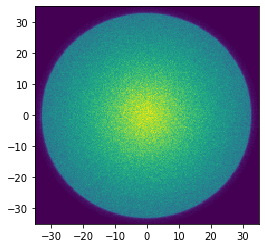

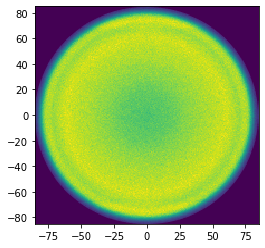

In [31]:
for files_g in filenames_g:
    plt.subplots(1,1,figsize=(4,4))
    _=plt.hist2d(data_frame_dict[files_g]['X'],data_frame_dict[files_g]['Y'],bins=(200,200))
#     plt.pause(1)
    plt.show()
#     input("wait")

In [25]:
import uproot

file = uproot.open("/work/lb8075/PhaseSpaces/PhS1A_Gamma/output-phs1A_1.root")
# print(file.keys())
print(file['PhaseSpace'].keys())

[b'AtomicNumber', b'Ekine', b'Weight', b'Mass', b'X', b'Y', b'Z', b'dX', b'dY', b'dZ', b'ParticleName', b'TrackID', b'ParentID', b'EventID', b'RunID', b'TOut', b'TProd']


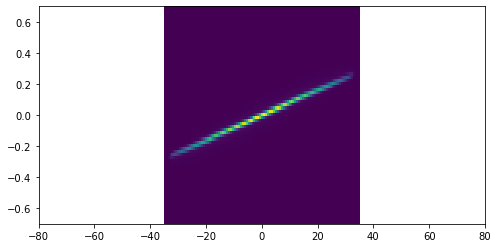

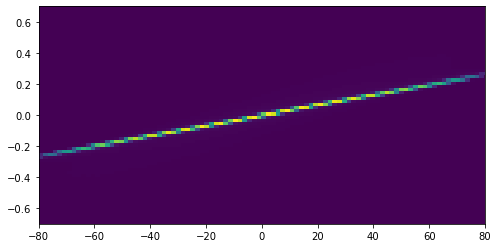

In [32]:
for files_g in filenames_g:
    plt.subplots(1,1,figsize=(8,4))
    _=plt.hist2d(data_frame_dict[files_g]['X'],data_frame_dict[files_g]['dX'],bins=(100,100))
    plt.xlim(-80,80)
    plt.ylim(-0.7,0.7)
#     plt.pause(1)
    plt.show()
#     input("wait")


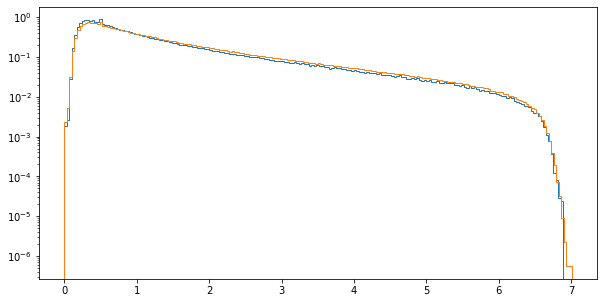

In [36]:
plt.subplots(1,1,figsize=(10,5))

for files_g in filenames_g:
    if "Brem1-" in files_g:
        _=plt.hist(data_frame_dict[files_g]['Ekine'],density=True,weights=data_frame_dict[files_g]['Weight'],histtype='step',bins=(200),label=files_g[-10:-5])
    else:
        _=plt.hist(data_frame_dict[files_g]['Ekine'],density=True,weights=data_frame_dict[files_g]['Weight'],histtype='step',bins=(200),label=files_g[-10:-5])

plt.yscale('log')
plt.legend
# plt.xlim(0,5.8)
# plt.ylim(10,4000)
plt.show()


In [ ]:


filenames_e=["/work/lb8075/PhaseSpaces/PhS1Elec_tests/output-phs1A_9.root"]
data_frame_dict={}

for files_e in filenames_e:
    print(f"{files_e}   \n")
    ur=uproot.pandas.iterate(files_e, "PhaseSpace", ['X','Y','dX','dY','Weight','Ekine'])
    mylist=list(ur)        
    data_frame_dict[files_e]=pd.concat(mylist, ignore_index=True, sort=False  ,copy = False)


In [ ]:
plt.subplots(1,1,figsize=(10,6))

for files_e in filenames_e:
    labelname=files_e[52:-16]
    print(labelname)
    _=plt.hist(data_frame_dict[files_e]['Ekine'],weights=data_frame_dict[files_e]['Weight'],histtype='step',bins=(150),label=labelname)

plt.legend()
# plt.xlim(0,6.5)
plt.ylim(10,1000)
plt.yscale('log')
plt.show()
